# Numerical Simulation Laboratory

# Numerical exercise 8

## Exercise 08.1 - 08.2

Sviluppo un codice *Monte Carlo variazionale* per ottimizzare il ground state di una singola particella confinata in un potenziale monodimensionale della seguente forma:
    $$ V(x) = x^4 - \frac{5}{2}x^2 \,. $$
Per ottenere una funzione d'onda approssimata dello stato fondamentale del sistema, il codice utilizza una funzione di prova iniziale ottenuta dalla seguente equazione e dipendente dai parametri variazionali $\mu$ e $\sigma$:
    $$ \Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}} \,.$$
I due parametri variazionali $\mu$ e $\sigma$ corrispondono rispettivamente alla radice quadrata dell'ampiezza e al valore medio delle due gaussiane.
Fissata la forma dell'autofunzione dipendente dai parametri variazionali, determino l'energia del sistema tramite integrazione Monte Carlo. Infatti il calcolo del valor medio dell'Hamiltoniana può essere riformulato come integrale del prodotto dei due termini seguenti:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}  \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \,.
$$
Il primo termine definisce la densità di probabilità che è necessario campionare tramite **l'algoritmo di Metropolis**, mentre il secondo termine definisce l'energia locale del sistema
    $$ E_{loc} =  \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \,,$$
che è possibile determinare analticamente nota la forma della funzione d'onda tentativo $\Psi_T$. Calcolando quindi l'energia locale nei valori $x_i$ campionati secondo la densità di probabilità desiderata, possiamo stimare facilmente l'energia media dello stato $\Psi_T$ tramite integrazione Monte Carlo *importance sampling*:
    $$ \langle {\hat H} \rangle_T = \frac{1}{N} \sum_i E_{loc}(x_i) \,.$$
Tale procedimento viene iterato nel codice in modo da poter sfruttare le **medie a blocchi** per stimare il valore medio dell'integrale e le incertezze statistiche.

### <font color=red> Ottimizzazione dei parametri </font>
Poichè lo stato fondamentale è caratterizzato dal minimo dell'energia del sistema, i parametri variazionali $\mu$ e $\sigma$ che corrispondono al ground state devono minimizzare l'integrale dell'Hamiltoniana $\langle {\hat H} \rangle_T$. Per ottimizare tali parametri ho utilizzato il metodo del **simulated annealing**.
Utilizzando l'algoritmo di Metropolis, sfruttando una transizione uniforme di ampiezza $\delta=0.015$, campiono posizioni successive nello spazio dei parametri variazionali $\mu$ e $\sigma$ e accetto ogni mossa con una probabilità pari a:

$$ \alpha = min \left[1, \exp^{-\beta\left( \Delta E \right)}  \right] \quad \quad 
    \Delta E = \langle {\hat H} \rangle_{\mu', \sigma'} -  \langle {\hat H} \rangle_{\mu, \sigma}    \,,$$
    
Nell'equazione precedente $\left( \mu', \sigma' \right)$ corrisponde alla posizione proposta, $\left(\mu, \sigma \right)$ è la posizione attuale e il parametro $\beta$ rappresenta l'inverso di una temperatura fittizia $t=\frac{1}{\beta}$ che durante il procedimento tende gradualmente a zero simulando il raffreddamento di un sistema termodinamico. In particolare durante il procedimento di minimizzazione ho fatto variare la temperatura dal valore massimo $t_{max}=15$ fino al valore minimo $t_{min}=0.1$: in questo modo l'algoritmo campiona valori che si avvicinano progressivamente al minimo globale dell'energia $\langle {\hat H} \rangle_{\mu, \sigma}$. Per ogni coppia di parametri variazionali ho calcolato l'integrale Monte Carlo utilizzando $20$ blocchi e $1000$ step ciascuno e per ogni valore della temperatura ho campionato $25$ valori successivi dei parametri $\mu$ e $\sigma$. I **parametri variazionali ottimali** così ottenuti sono:
    $$ \mu=0.83 \,, \quad \sigma=0.63 \,.$$

### <font color=blue> Energia </font>
Il grafico sottostante mostra i valori medi e le incertezze statistiche ottenute tramite integrazione Monte Carlo utilizzando i parametri ottimizzati in funzione del numero di valori campionati per effettuare il calcolo. In particolare ho effettuato il calcolo usando $100$ blocchi composti da $5 \times 10^5$ step ciascuno e utilizzando una transizione uniforme di larghezza $\delta = 2.55$ in modo da avere un'accetanza intorno al 50%.
Il risultato ottenuto è mostrato nel grafico sottostante in funzione del numero di step dell'algoritmo di Metropolis effettuati per campionare la densità di probabilità e calcolare l'integrale. Il risultato è simile ma non strettamente compatibile col valore ottenuto tramite soluzione matriciale $E_0 = -0.46046$.

Valore finale dell'energia: -0.43883


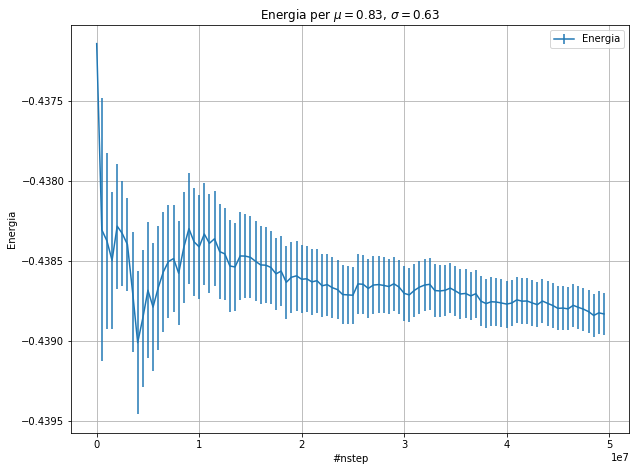

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

nblock = 100 #numero di blocchi
nstep = 5e5  #step per blocco
ntot = nblock*nstep #step totali

fig=plt.figure(figsize=(10,7.5))
nstep = np.arange(0, ntot, step=nstep)
Ene, errEne = np.loadtxt('Files/Ene.out', unpack=True)
print("Valore finale dell'energia:", round(Ene[len(Ene)-1], 5))

plt.title("Energia per $\mu=0.83$, $\sigma=0.63$")
plt.errorbar(nstep, Ene, yerr=errEne, label='Energia')
plt.xlabel("#nstep")
plt.ylabel("Energia")
plt.legend()
plt.grid(True)
plt.show()

### <font color=blue> Denstà di probabilità </font>
Il grafico sottostante mostra la densità di probabilità campionata tramite l'algoritmo di Metropolis per la funzione d'onda ottimizzata. La funzione è stata costruita come istogramma dei valori campionati sfruttando le **medie a blocchi** per determinare l'altezza di ciascun bin dell'istogramma. In particolare ho suddiviso l'intervallo $[-3,3]$ in $150$ bins e ho calcolato tramite medie progressive sui blocchi della simulazione l'altezza di ogni bin dell'istogramma. Il risultato è riportato nel grafico sottostante in cui è presentato il confronto con la densità di probabilità teorica e quella ottenuta risolvendo il problema di Schrodinger matriciale.

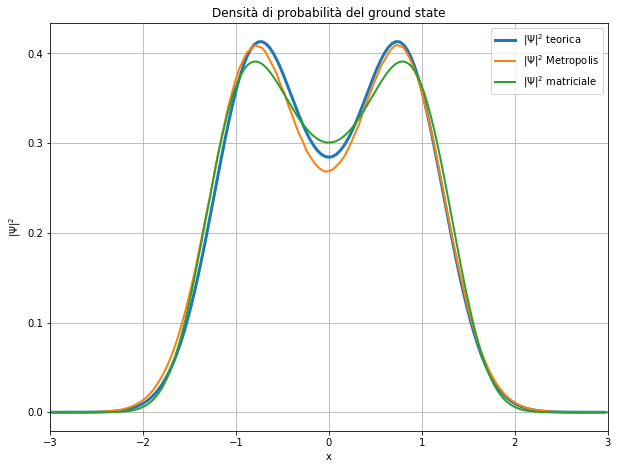

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


In [7]:
import math
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
pi = math.pi

def Vpot(x):
    return (x**2 - 2.5)*x**2

a = 10
N = 1000 # number of iterations
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# Hamiltonian matrix
H = (-CDiff)/(2*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

fig=plt.figure(figsize=(10,7.5))
mu = 0.8070
sigma = 0.6221

X, Psi2 = np.loadtxt('Files/Psi.out', unpack=True)
Psiteo = np.exp( -(X-mu)**2/(2*sigma*sigma) ) + np.exp( -(X+mu)**2/(2*sigma*sigma) )
pdf = Psiteo**2

norm = integrate.simps(pdf, X)
pdf /= norm

norm = integrate.simps(Psi2, X)
Psi2 /= norm

plt.plot(X, pdf, label='$|\Psi|^2$ teorica', lw=3)
plt.plot(X, Psi2, label='$|\Psi|^2$ Metropolis', lw=2)
plt.plot(x,(psi[0])**2, label="$|\Psi|^2$ matriciale", lw=2)
plt.xlim(-3, 3) 
plt.title('Densità di probabilità del ground state')
plt.xlabel("x")
plt.ylabel("$|\Psi|^2$")
plt.grid(True)
plt.legend()
plt.show()

#Autovalori energia
print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

## Exercise 08.3

Applico il codice PIMC e PIGS per risolvere lo stesso sitema e confrontare i risultati con quelli ottenuti tramite il calcolo Monte Carlo variazionale.

### <font color='blue'> Path Integral Ground State </font>

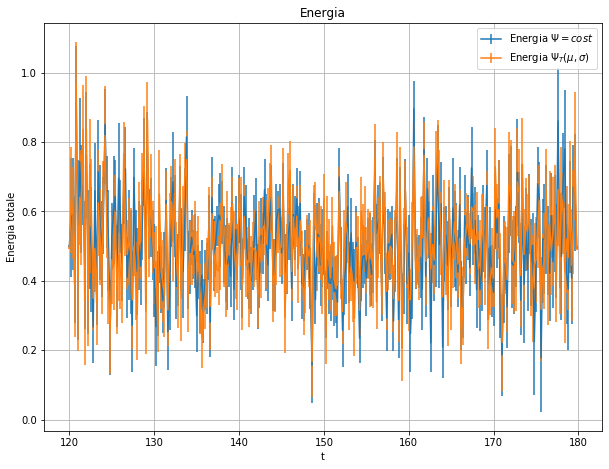

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

tstart = 120
tstop = 180
nslices = 300

#funzione d'onda costante
t, E1, errE1 = np.loadtxt('Files/PIGS/Cost_kinetic.dat', unpack=True)
t, V1, errV1 = np.loadtxt('Files/PIGS/Cost_potential.dat', unpack=True)
#funzione d'onda Psi_trial
t, E2, errE2 = np.loadtxt('Files/PIGS/Expo_kinetic.dat', unpack=True)
t, V2, errV2 = np.loadtxt('Files/PIGS/Expo_potential.dat', unpack=True)

H1 = E1 + V1
errH1 = np.sqrt(errE1**2 + errV1**2)
H2 = E2 + V2
errH2 = np.sqrt(errE2**2 + errV2**2)
t *= (tstop-tstart)/nslices
t += tstart

fig=plt.figure(figsize=(10,7.5))
plt.title("Energia")
plt.errorbar(t, H1, yerr=errH2, label='Energia $\Psi=cost$')
plt.errorbar(t, H2, yerr=errH1, label='Energia $\Psi_T(\mu, \sigma)$')
plt.xlabel("t")
plt.ylabel("Energia totale")
plt.legend()
plt.grid(True)
plt.show()

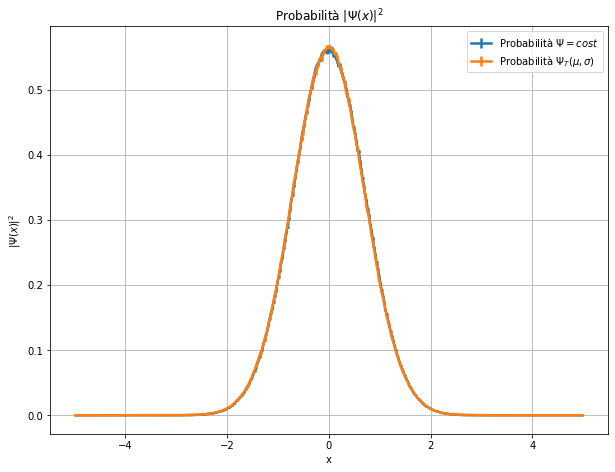

In [17]:
#funzione d'onda costante
x, psiCost, errCost = np.loadtxt('Files/PIGS/Cost_probability.dat', unpack=True)
#funzione d'onda Psi_trial
x, psiExpo, errExpo = np.loadtxt('Files/PIGS/Expo_probability.dat', unpack=True)

fig=plt.figure(figsize=(10,7.5))
plt.title("Probabilità $|\Psi(x)|^2$")
plt.errorbar(x, psiCost, yerr=errCost, label='Probabilità $\Psi=cost$', lw=2.5)
plt.errorbar(x, psiExpo, yerr=errExpo, label='Probabilità $\Psi_T(\mu, \sigma)$', lw=2.5)
plt.xlabel("x")
plt.ylabel("$|\Psi(x)|^2$")
plt.legend()
plt.grid(True)
plt.show()

### <font color='blue'> Path Integral Monte Carlo </font>

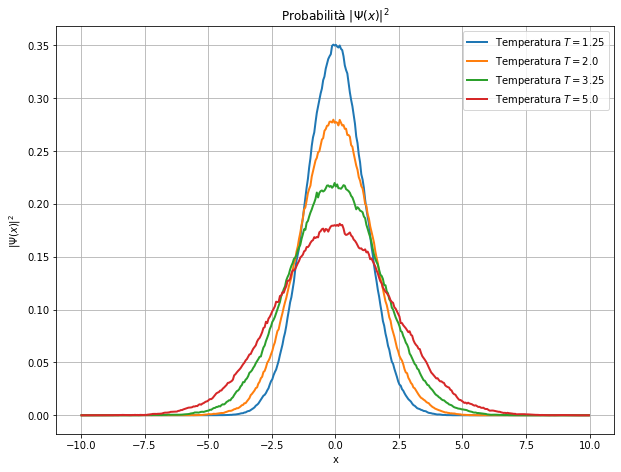

In [35]:
T = [1.25, 2.0, 3.25, 5.0]
fig=plt.figure(figsize=(10,7.5))

for i in range(len(T)):
    lab = 'Temperatura $T=' + str(T[i]) + '$'
    #probabilità in funzione della temperatura
    x, psi, err = np.loadtxt('Files/PIMC/probability_' + str(T[i]) + '.dat', unpack=True)
    #plt.errorbar(x, psi, yerr=err, label=lab, lw=2.5)
    plt.plot(x, psi, label=lab, lw=2)
    
plt.title("Probabilità $|\Psi(x)|^2$")
plt.xlabel("x")
plt.ylabel("$|\Psi(x)|^2$")
plt.legend()
plt.grid(True)
plt.show()